In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Additional Measures needed, e.g. Confusion Matrix, accuracy over iteration, classification report
# TODO: Too many medium quality in the dataset... How can we handle this?
# TODO: Errors in the confusion matrices, need to be fixed

In [4]:
# Read the dataset
data_file = 'winequality-red-4.csv'

# Read the data as a DataFrame with one column
df_raw = pd.read_csv(data_file, header=None)

# Extract the data from the first column
data = df_raw[0].tolist()

# The first row is the header
header = data[0]

# The rest are data rows
rows = data[1:]

# Split the header and data rows by semicolon
columns = header.split(';')
columns = [col.strip('"') for col in columns]  # Remove quotes from column names

data_rows = []
for row in rows:
    values = row.split(';')
    data_rows.append(values)


In [5]:
# Create a DataFrame
df = pd.DataFrame(data_rows, columns=columns)

# Convert data types to float, except for 'quality' which we convert to int
for col in columns[:-1]:
    df[col] = df[col].astype(float)
df['quality'] = df['quality'].astype(int)


First five rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8

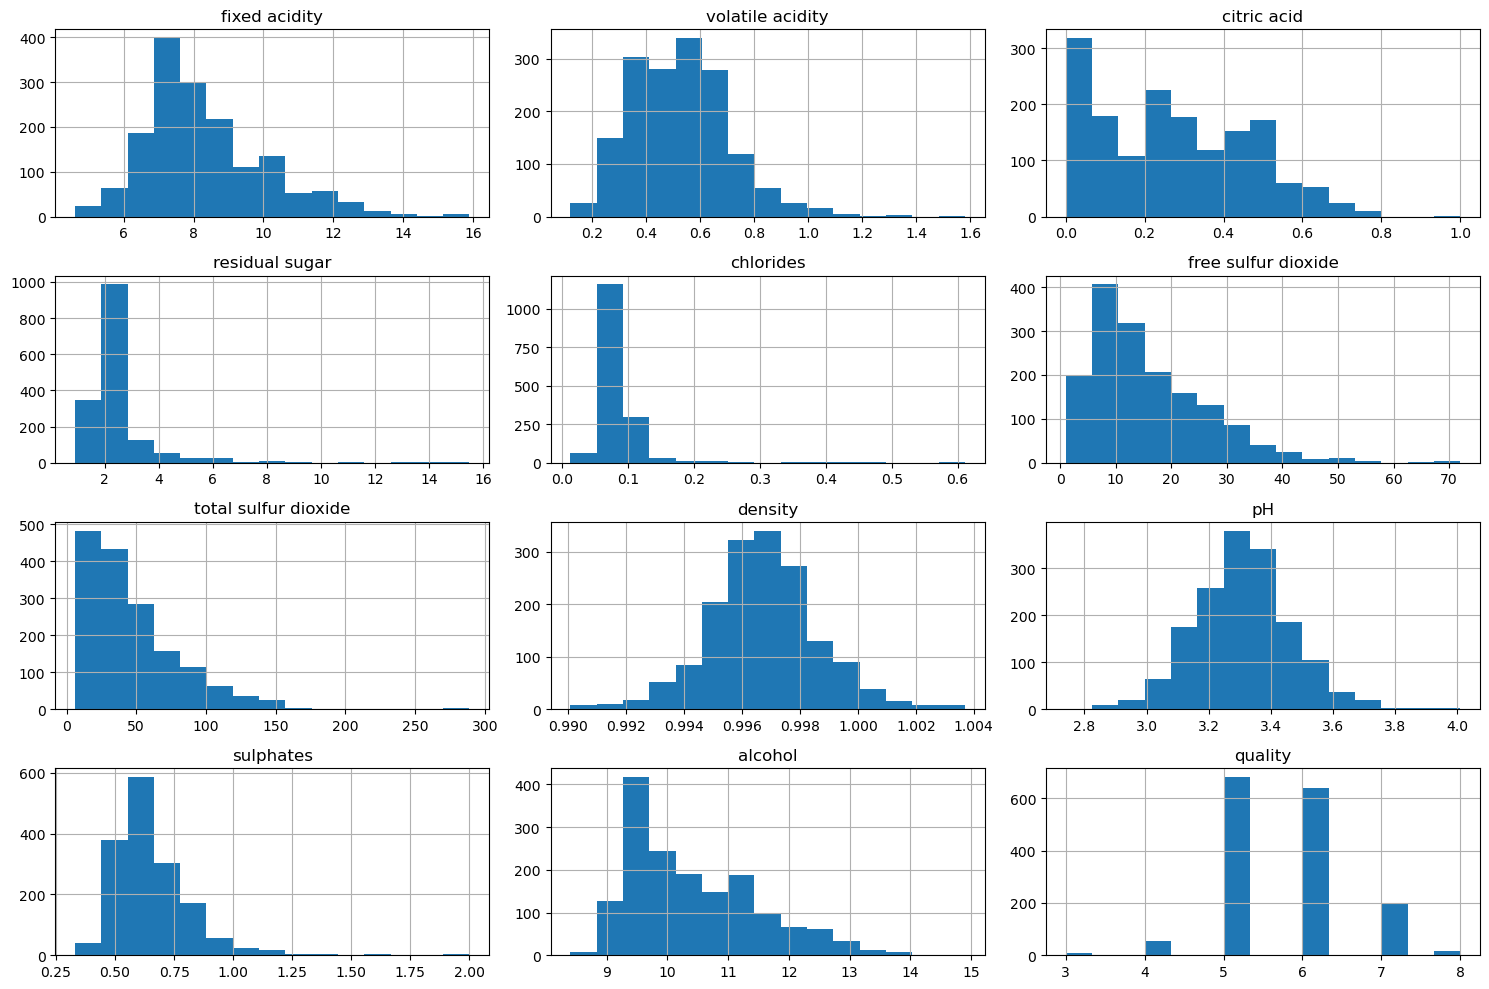

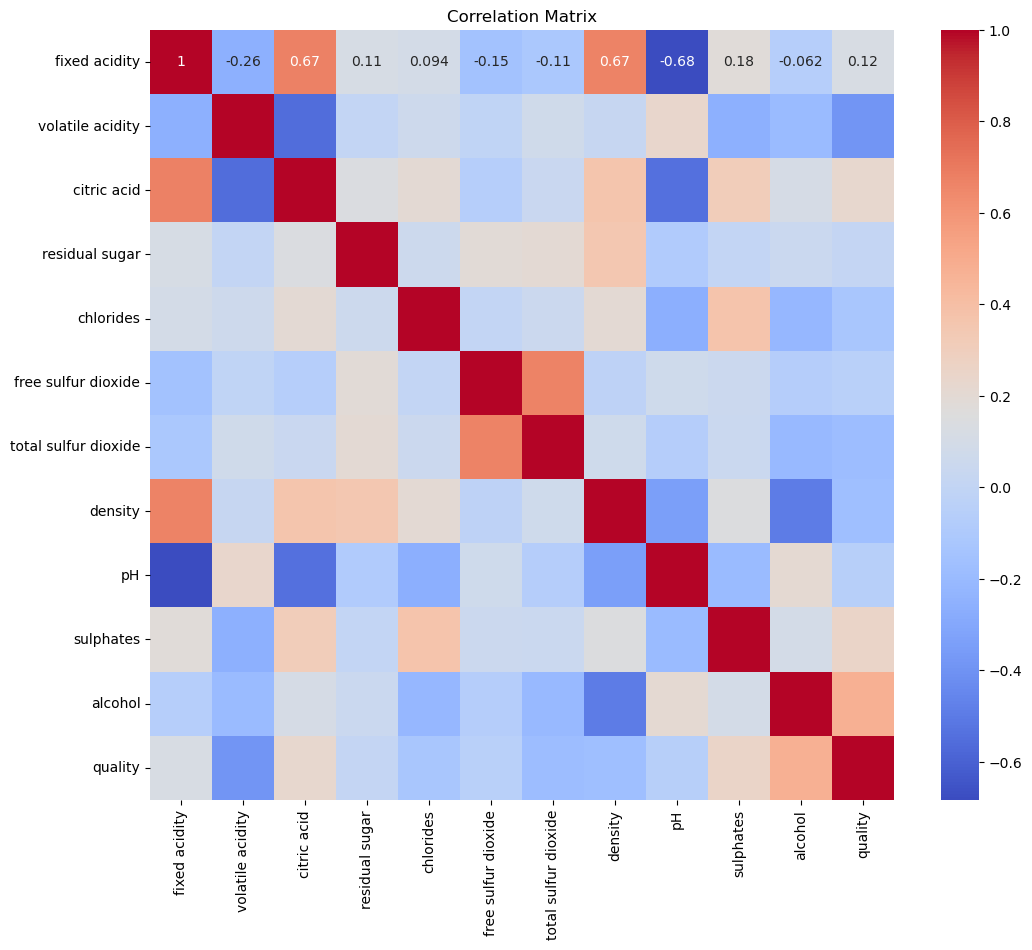

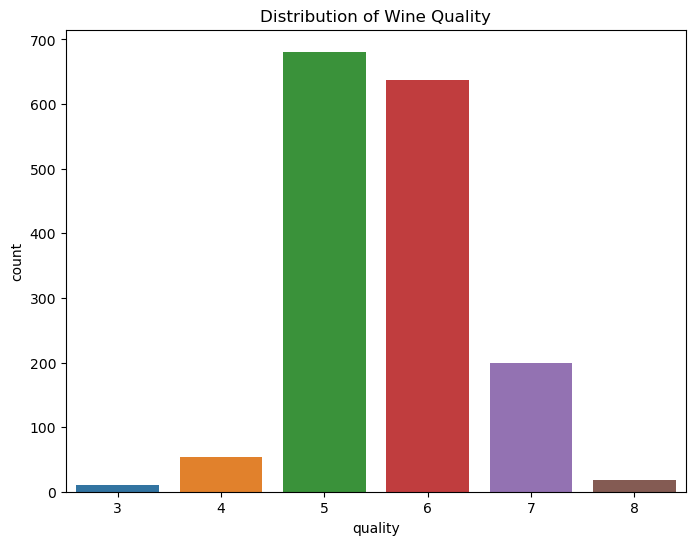

In [6]:
# Check the first few rows
print("First five rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic statistics
print("\nStatistical summary of the dataset:")
print(df.describe())

# Histograms of features
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# TODO: Only first row showed up numbers
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Distribution of quality scores
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()





In [30]:
# Binning quality scores into categories
bins = [0, 4, 6, 10]
labels = ['Low', 'Medium', 'High']
df['quality_cat'] = pd.cut(df['quality'], bins=bins, labels=labels, include_lowest=True)
print("\nCount of each quality category:")
print(df['quality_cat'].value_counts())

# Update target variable
y = df['quality_cat']



Count of each quality category:
quality_cat
Medium    1319
High       217
Low         63
Name: count, dtype: int64


In [31]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=123, stratify=y)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.42      0.49        43
         Low       0.00      0.00      0.00        13
      Medium       0.87      0.95      0.91       264

    accuracy                           0.84       320
   macro avg       0.49      0.46      0.47       320
weighted avg       0.80      0.84      0.82       320



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


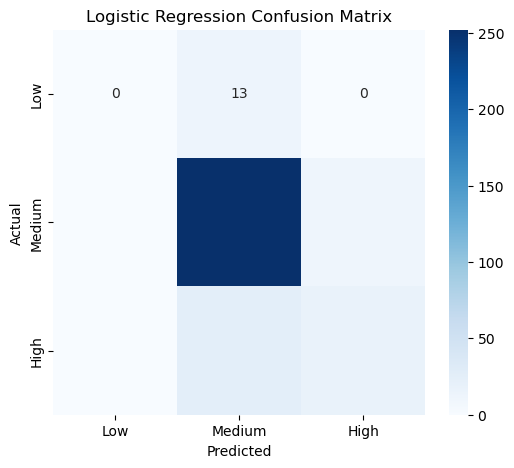

In [32]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000, random_state=123)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr, labels=labels), annot=True, fmt='d',
            cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Support Vector Machine Classification Report:
              precision    recall  f1-score   support

        High       0.62      0.35      0.45        43
         Low       0.00      0.00      0.00        13
      Medium       0.86      0.97      0.91       264

    accuracy                           0.84       320
   macro avg       0.50      0.44      0.45       320
weighted avg       0.79      0.84      0.81       320



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


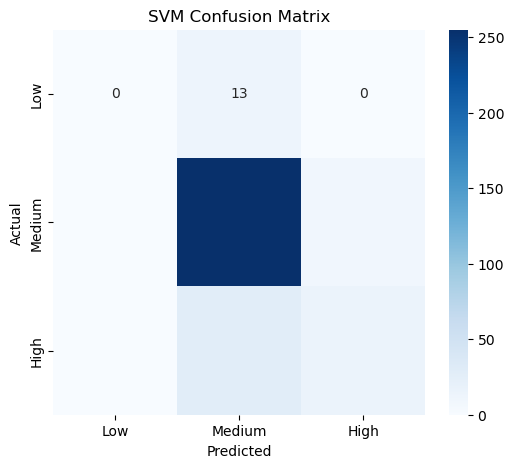

In [33]:
# 2. Support Vector Machine
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma='scale', random_state=123)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Confusion matrix for SVM
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svc, labels=labels), annot=True, fmt='d',
            cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Artificial Neural Network Classification Report:
              precision    recall  f1-score   support

        High       0.56      0.53      0.55        43
         Low       0.50      0.08      0.13        13
      Medium       0.89      0.93      0.91       264

    accuracy                           0.84       320
   macro avg       0.65      0.51      0.53       320
weighted avg       0.83      0.84      0.83       320



/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


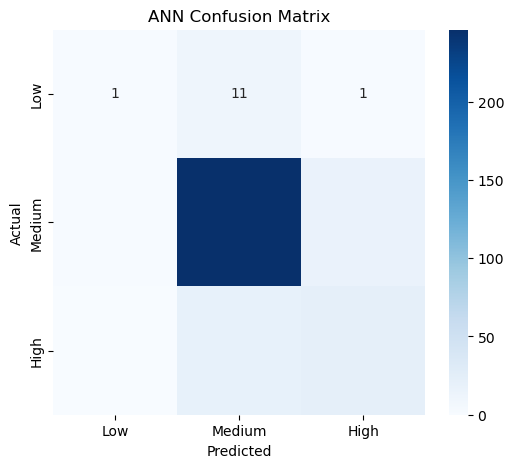

In [34]:
# 3. Artificial Neural Networks
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=123)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("\nArtificial Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix for ANN
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp, labels=labels), annot=True, fmt='d',
            cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.58      0.64        43
         Low       0.00      0.00      0.00        13
      Medium       0.89      0.96      0.93       264

    accuracy                           0.87       320
   macro avg       0.54      0.51      0.52       320
weighted avg       0.83      0.87      0.85       320



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


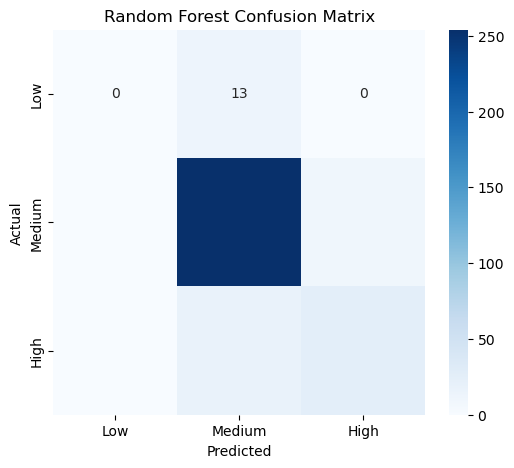

In [35]:
# 4. Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=123)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))

# Confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc, labels=labels), annot=True, fmt='d',
            cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        High       0.39      0.44      0.41        43
         Low       0.00      0.00      0.00        13
      Medium       0.86      0.88      0.87       264

    accuracy                           0.78       320
   macro avg       0.42      0.44      0.43       320
weighted avg       0.76      0.78      0.77       320



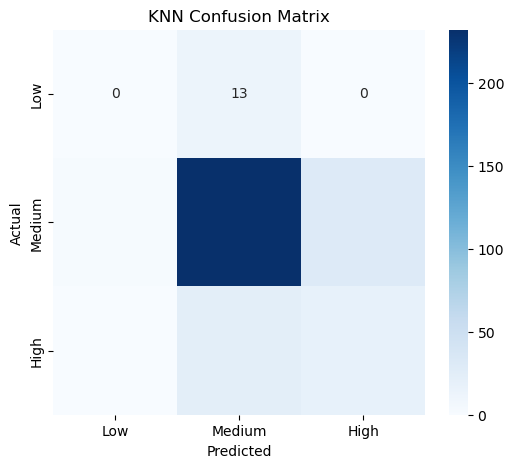

In [36]:
# 5. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn, labels=labels), annot=True, fmt='d',
            cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


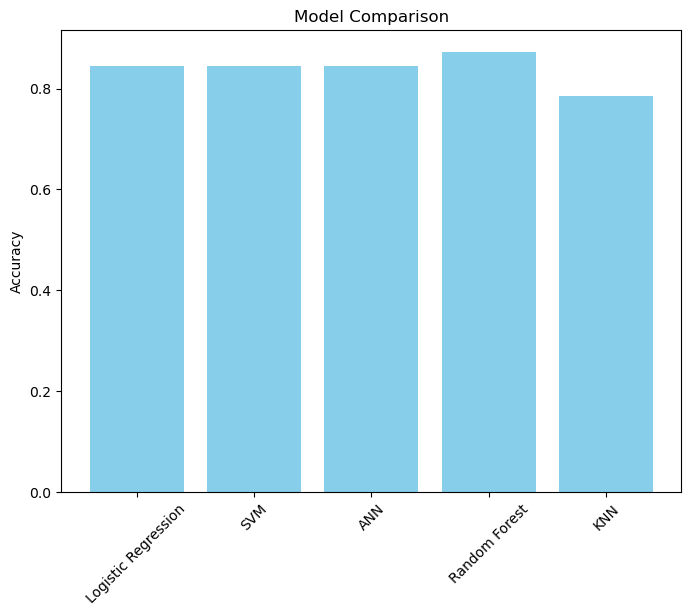

In [37]:
# Compare the performance of the models
from sklearn.metrics import accuracy_score

models = ['Logistic Regression', 'SVM', 'ANN', 'Random Forest', 'KNN']
accuracies = [accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_svc),
              accuracy_score(y_test, y_pred_mlp),
              accuracy_score(y_test, y_pred_rfc),
              accuracy_score(y_test, y_pred_knn)]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
